In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [21]:
dataframe = pd.read_csv(r"covid19_tweets.csv")
dataframe.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [22]:
dataframe.describe()

,user_followers,user_friends,user_favourites
count,7.443600e+04,74436.000000,7.443600e+04
mean,1.059513e+05,2154.721170,1.529747e+04
std,8.222900e+05,9365.587474,4.668971e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.660000e+02,153.000000,2.200000e+02
50%,9.600000e+02,552.000000,1.927000e+03
75%,5.148000e+03,1780.250000,1.014800e+04
max,1.389284e+07,497363.000000,2.047197e+06


In [24]:
#vemos cuantos usuarios hay de cada categoria
print(dataframe.groupby('user_friends').size())

user_friends
0         1152
1          559
2          346
3          500
4          276
          ... 
496973       1
497251       1
497287       1
497321       2
497363       1
Length: 7627, dtype: int64


In [25]:
#vemos cuantos usuarios hay de cada categoria
print(dataframe.groupby('user_favourites').size())

user_favourites
0          2003
1           805
2          1016
3           419
4           332
           ... 
1153211       1
1153721       2
1154019       3
1154435       3
2047197       1
Length: 21115, dtype: int64


In [26]:
#vemos cuantos usuarios hay de cada categoria
print(dataframe.groupby('user_followers').size())

user_followers
0           685
1           484
2           454
3           360
4           342
           ... 
13892793      1
13892795      1
13892837      1
13892839      1
13892841      1
Length: 15533, dtype: int64


In [34]:
#vemos cuantos usuarios hay de cada categoria
print(dataframe.groupby('user_verified').size())

user_verified
False    65082
True      9354
dtype: int64


In [35]:
print(dataframe.groupby('date').size)

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fa1708a62e0>>


In [36]:
#Para el ejercicio, sólo seleccionamos 3 dimensiones, para poder graficarlo
X = np.array(dataframe[["user_followers","user_friends","user_favourites"]])
y = np.array(dataframe['user_verified'])
X.shape

(74436, 3)

<ipython-input-37-d5f15470eb05>:7: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  asignar.append(colores[row])


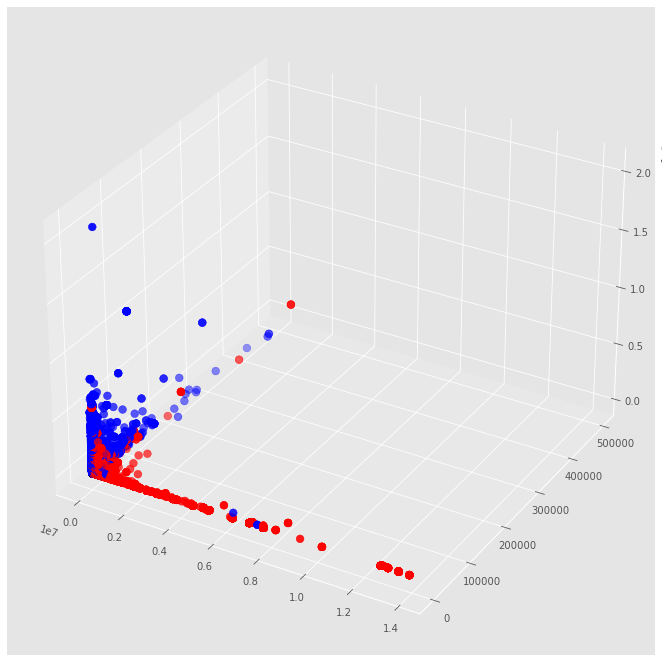

In [37]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
#NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en id 1. 
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

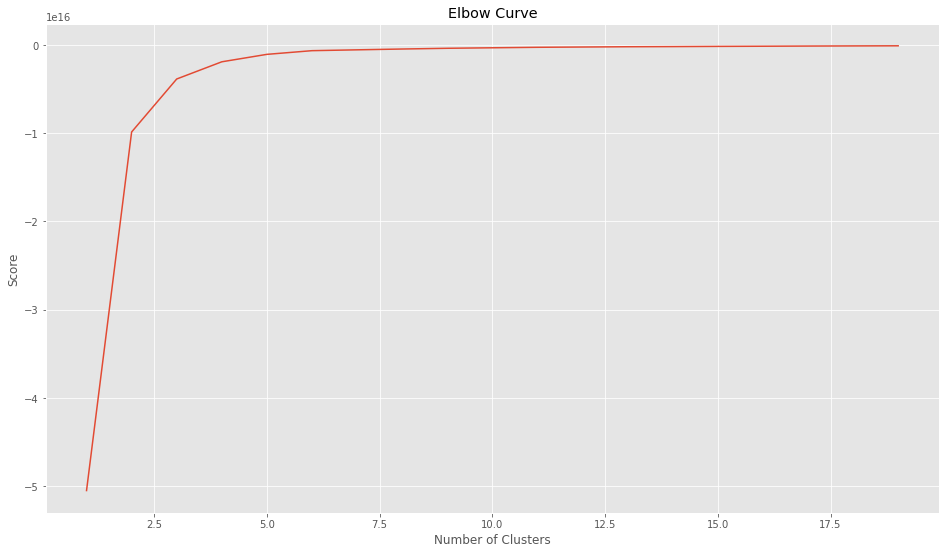

In [39]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [73]:
# Para el ejercicio, elijo 4 como un buen valor de K. Pero podría ser otro.
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.83148000e+04 2.17754637e+03 1.55150189e+04]
 [1.30086912e+07 2.19937888e+02 8.03913043e+01]
 [6.23958658e+06 7.68970414e+02 2.73377515e+03]
 [1.88081638e+06 1.20131633e+03 4.97820554e+03]]


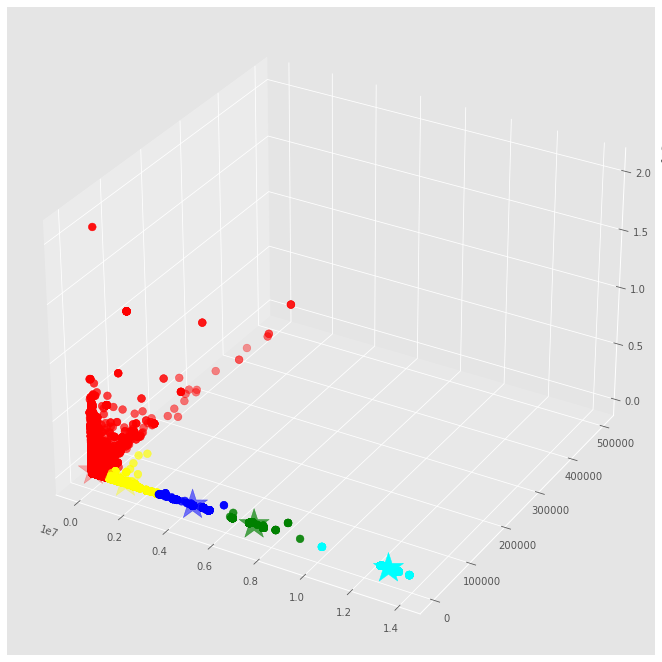

In [42]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

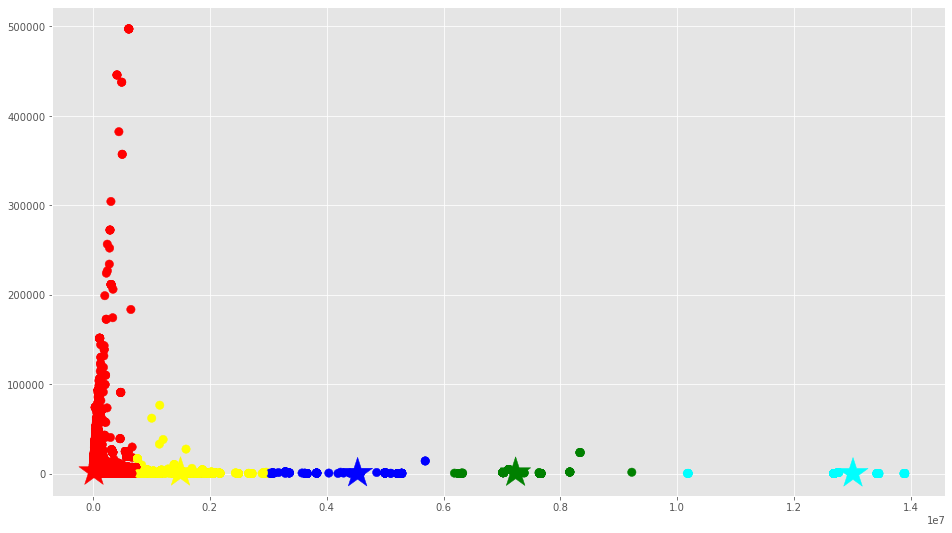

In [44]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = dataframe['user_followers'].values
f2 = dataframe['user_friends'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

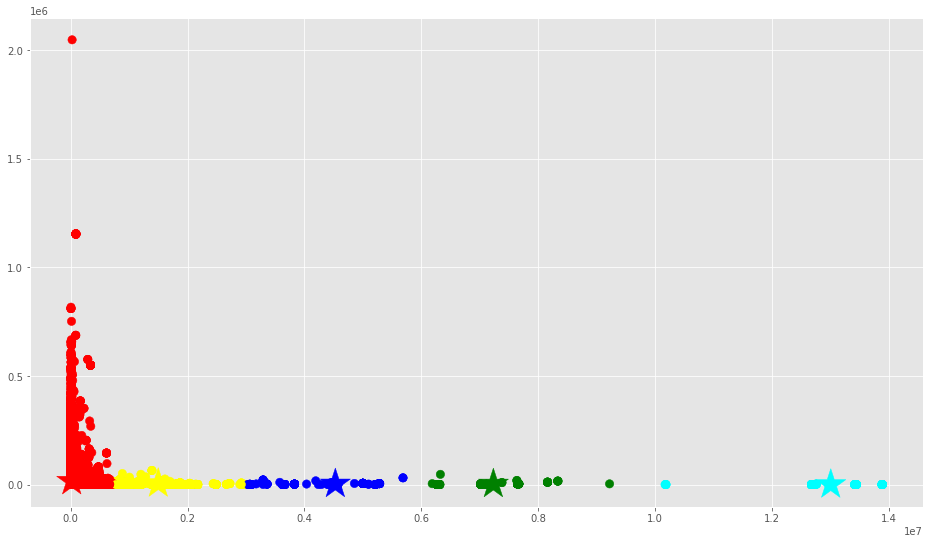

In [45]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = dataframe['user_followers'].values
f2 = dataframe['user_favourites'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

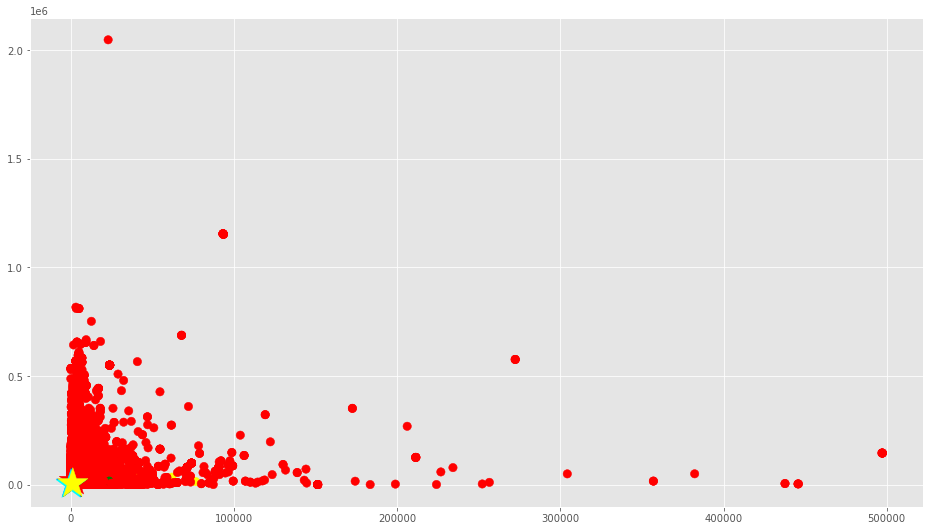

In [47]:
f1 = dataframe['user_friends'].values
f2 = dataframe['user_favourites'].values

'''
# este codigo comentado agrega las categorias sobre cada punto
for label, x, y in zip(dataframe['user_verificated'].values, f1, f2):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='blue', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
'''
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [57]:
# contamos cuantos usuarios hay en cada grupo
copy =  pd.DataFrame()
copy['hashtags']=dataframe['hashtags'].values
copy['user_verificated']=dataframe['user_verified'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,72897
1,green,295
2,blue,282
3,cyan,161
4,yellow,801


In [58]:
# Veamos cuantos usuarios en cada categoria hay en el grupo 0
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['user_verificated']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('user_verificated').size()
diversidadGrupo

,user_verificated,cantidad
0,0,65069.0
1,1,7828.0
2,2,NaN
3,3,NaN
4,4,NaN
5,5,NaN
6,6,NaN
7,7,NaN
8,8,NaN
9,9,NaN


In [62]:
#imprimimos en pantalla los usuarios con categoria 2 del grupo
for index, row in group_referrals.iterrows():
    if row["user_verificated"] == 2:
        print (row["hashtags"], row["user_verificated"],row["label"])

In [63]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([33916, 21017, 32871, 70675, 69690])

In [66]:
users=dataframe['hashtags'].values
for row in closest:
    print(users[row])

['COVID19']
nan
nan
['COVID19']
['InTheNews']


In [68]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta personality traits
new_labels = kmeans.predict(X_new)
print(new_labels)

[0]


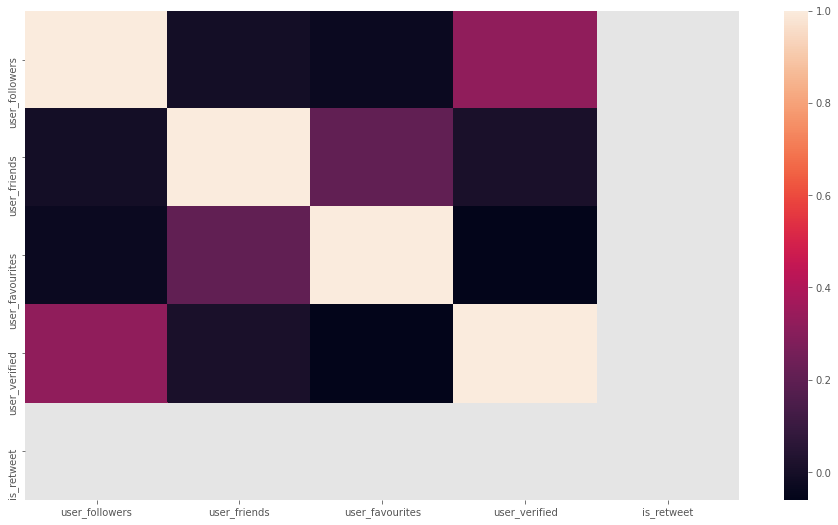

In [72]:
#mapas de calor
import seaborn as sns
data=pd.read_csv("covid19_tweets.csv")
df=data.corr(method='pearson')
sns.heatmap(df)
plt.show()